<a href="https://colab.research.google.com/github/sebastienkessler/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Cr√©er de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des donn√©es √† partir de fichiers `.npy` * Effectuer des r√©ductions (par exemple `.npy`)
* Effectuer des r√©ductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* R√©aliser des trac√©s lin√©aires 1D
* R√©aliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce probl√®me, nous utilisons des donn√©es r√©elles provenant de flotteurs de profilage oc√©anique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des donn√©es sur la temp√©rature, la salinit√© et la pression de l'oc√©an. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures √† diff√©rentes profondeurs ou "niveaux").

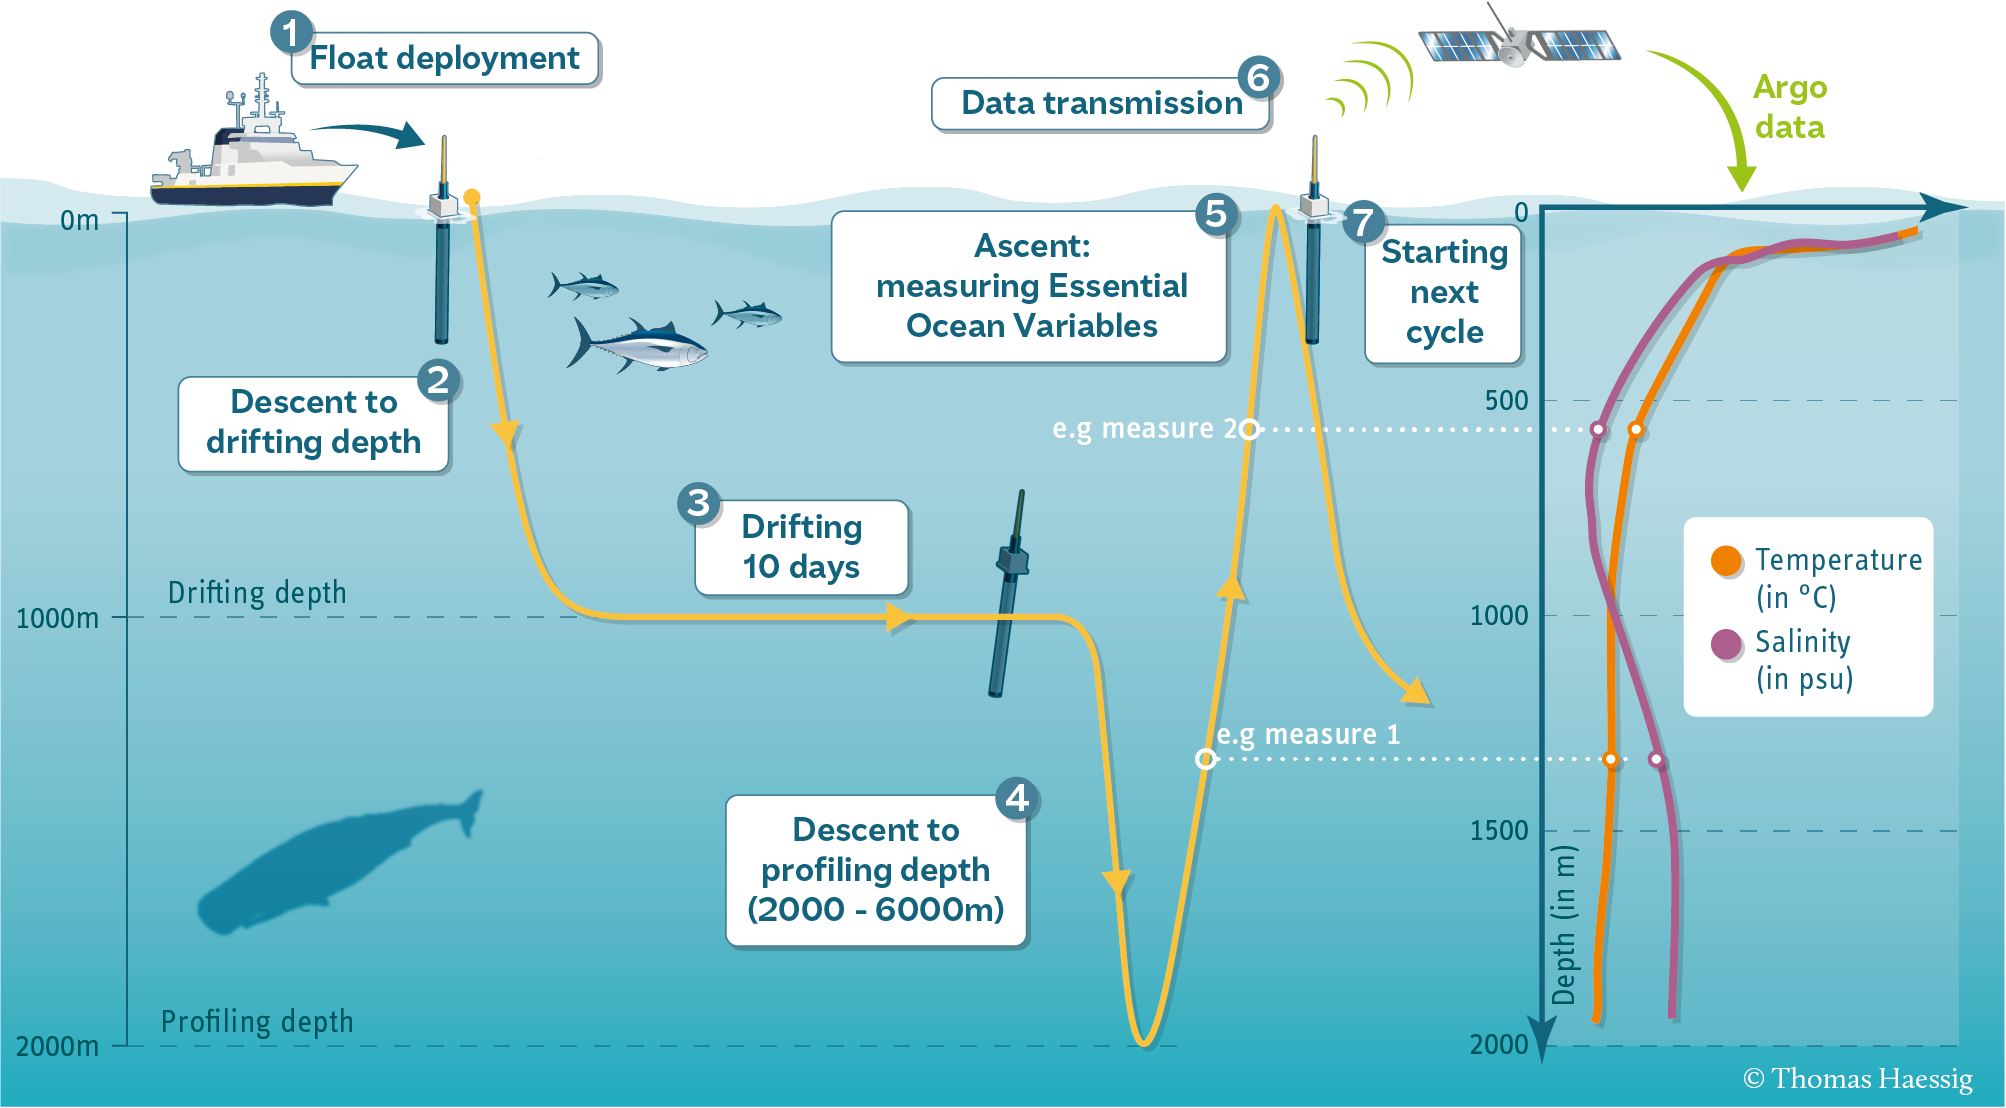


Chaque profil est associ√© √† une latitude, une longitude et une date, ainsi qu'√† de nombreux niveaux diff√©rents.

Commen√ßons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour t√©l√©charger les fichiers de donn√©es dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir √† l'√©tape suivante.

In [32]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [33]:
import numpy as np

**Q1) Chargez chaque fichier de donn√©es sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : temp√©rature

`S` : salinit√©

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les √©l√©ments dans `files`) pour savoir quel fichier correspond √† quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des √©l√©ments des fichiers ici

In [38]:
T=np.load(files[6])
S=np.load(files[0])
P=np.load(files[4])
date=np.load(files[2])
lat=np.load(files[5])
lon=np.load(files[1])
level=np.load(files[3])
level

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compr√©hension de liste

In [37]:
P,date,lat,S,level,lon,T = [np.load(files[n])for n in range(len(files))]


**Q2) Recr√©ez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [√† ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [35]:
print(level)

[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]


Recr√©ez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [30]:
#@title Code √† compl√©ter (au besoin)
level_arange = np.arange(0,78)
level_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

V√©rifiez que `level` et `level_arange` sont √©gaux en utilisant `np.testing.assert_equal`

In [39]:
print(np.testing.assert_equal(level,level_arange))

None


Recr√©er le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [40]:
level_linspace=np.linspace(0,77,78)
level_linspace

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

V√©rifiez que `level` et `level_linspace` sont √©gaux en utilisant `np.testing.assert_equal`

In [44]:
print(np.testing.assert_equal(level,level_linspace))

None


**Q3) Examinez les formes de `T`, `S` et `P` par rapport √† `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont li√©s ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables charg√©es

In [45]:
T.shape,S.shape,P.shape,lon.shape,lat.shape,date.shape,level.shape

((78, 75), (78, 75), (78, 75), (75,), (75,), (75,), (78,))

D'apr√®s les formes, quelles sont les dimensions partag√©es entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densit√© de l'eau de mer `relative_density`, par rapport √† l'eau pure, en fonction de la temp√©rature, de la salinit√© et de la pression.**

`densit√©_relative`$ = œÅ -œÅ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

o√π :

* Les densit√©s $\rho$ et $œÅ_{Pure\ eau}$ sont exprim√©es en unit√©s $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la temp√©rature conservative $\Theta$ (en unit√©s Celcius) √† partir de la temp√©rature, de la salinit√© et de la pression est fournie ci-dessous.
* La temp√©rature $T$ est exprim√©e en unit√©s Celcius.
* La salinit√© $S$ est exprim√©e en unit√©s $g/kg$.
* La pression $p$ est exprim√©e en unit√©s $dbar$.

Astuce : Les tableaux `numpy` charg√©s `temperature`, `salinity`, et `pressure` ont d√©j√† les bonnes unit√©s et aucune conversion n'est n√©cessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [46]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la biblioth√®que [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la temp√©rature conservative $\Theta$ √† partir de la temp√©rature, de la salinit√© et de la pression.

In [47]:
!pip install gsw
from gsw import CT_from_t

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 48.6 MB/s eta 0:00:00


Maintenant, c'est √† vous de jouer. Voici l'√©quation pour √©viter d'avoir √† faire d√©filer la page vers le haut :

`densit√©_relative`$ = œÅ -œÅ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la temp√©rature conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [48]:
CT=CT_from_t(S,T,P)

Calculez la "densit√© relative" √† l'aide de l'√©quation ci-dessus.

In [50]:
densit√©_relative=a*S+b*CT+c*CT**2
densit√©_relative

array([[24.26878778, 24.30901623, 24.18510597, ..., 24.37483439,
        23.60704513, 23.98828331],
       [24.32477667, 24.32400413, 24.19045883, ..., 24.53101768,
        24.09992029, 23.98930505],
       [24.45644758, 24.33382758, 24.19427794, ..., 24.58041622,
        24.21339484, 24.000865  ],
       ...,
       [26.58088425, 26.58466521, 26.58605858, ..., 26.59390729,
        26.5980916 , 26.59702996],
       [26.58479005, 26.58939524, 26.59027359, ..., 26.59905835,
        26.60307089, 26.60154496],
       [26.58919785, 26.59362837, 26.59605156, ...,         nan,
        26.60731704,         nan]])

**Q4) Faites un graphique pour chaque colonne de donn√©es dans `T`, `S`, `P`, et
`densit√©_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la biblioth√®que [Matplotlib](https://matplotlib.org/) pour la visualisation, m√™me si nous ne l'avons pas encore √©tudi√©e en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles √† suivre ci-dessous. üòä

La premi√®re √©tape consiste √† importer Pyplot. Il suffit d'ex√©cuter le code ci-dessous.

In [51]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'oc√©an, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en d√©duire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'√©chelle verticale doit utiliser les donn√©es `level` pour √™tre coh√©rente avec les conventions oc√©anographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de donn√©es. Le r√©sultat sera d√©sordonn√©, comme dans le graphique ci-dessous :

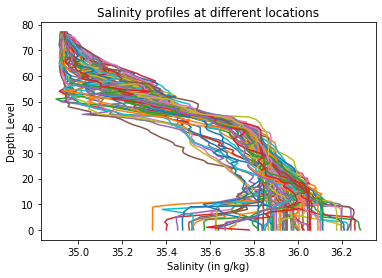

Text(0.5, 1.0, 'Salinity profiles at different locations')

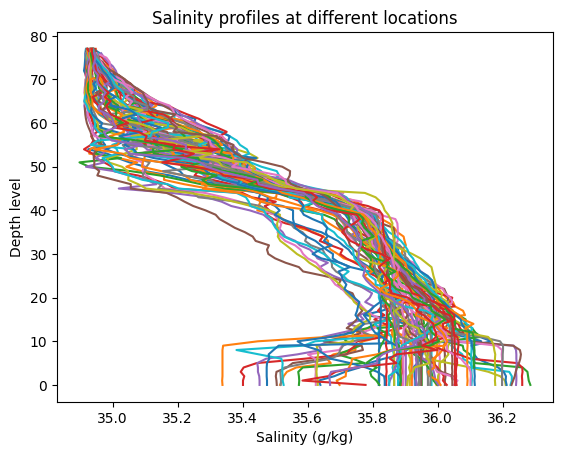

In [53]:
plt.plot(S,level) ; # Le point-virgule emp√™che l'impression des objets de ligne
plt.xlabel('Salinity (g/kg)') # Prend une cha√Æne de caract√®res comme argument
plt.ylabel('Depth level')
plt.title('Salinity profiles at different locations')

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Densit√© relative at different locations')

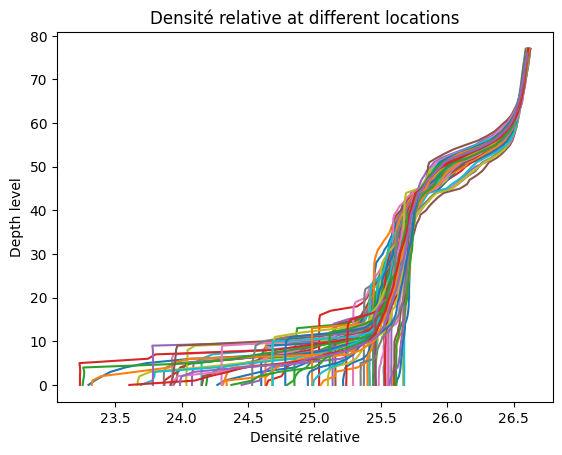

In [54]:
plt.plot(densit√©_relative,level) ;
plt.xlabel('Densit√© relative')
plt.ylabel('Depth level')
plt.title('Densit√© relative at different locations')

**Q5) Calculez la moyenne et l'√©cart-type de `T`, `S`, `P`, et `seawater_density` √† chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez v√©rifier que vous avez pris la moyenne et les √©carts types le long des axes corrects en v√©rifiant la "forme" de vos r√©sultats.

Calculez les moyennes...

In [72]:
T_mean=np.mean(T,axis=1)
S_mean=np.mean(S,axis=1)
P_mean=np.mean(P,axis=1)
density_mean=np.mean(densit√©_relative,axis=1)


... et les √©carts types.

In [77]:
T_std=np.std(T,axis=1)
S_std=np.std(S,axis=1)
P_std=np.mean(P,axis=1)
density_std=np.std(densit√©_relative,axis=1)

V√©rifiez qu'elles ont la m√™me forme que vos coordonn√©es de niveau vertical `lev` :

In [81]:
np.testing.assert_equal(T_std.shape,level.shape)

**Q6) Faites maintenant des trac√©s similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densit√©_de_l'eau_de_mer` √† chaque profondeur. Faites appara√Ætre les barres d'erreur sur chaque graphique en utilisant les √©carts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires √† celui ci-dessous

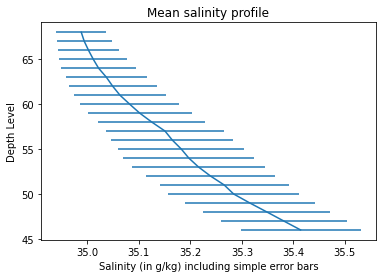

Text(0.5, 1.0, 'Mean salinity profile')

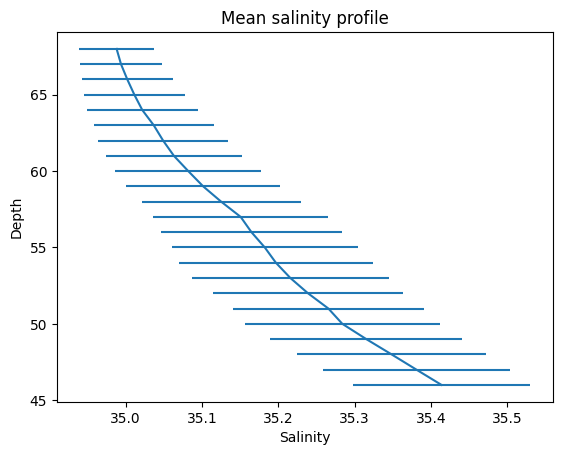

In [84]:
plt.errorbar(S_mean,level,xerr=S_std)
plt.xlabel('Salinity')
plt.ylabel('Depth')
plt.title('Mean salinity profile')

Encore trois plots et nous serons pr√™ts üôÇ .

Text(0.5, 1.0, 'Mean temperature profile')

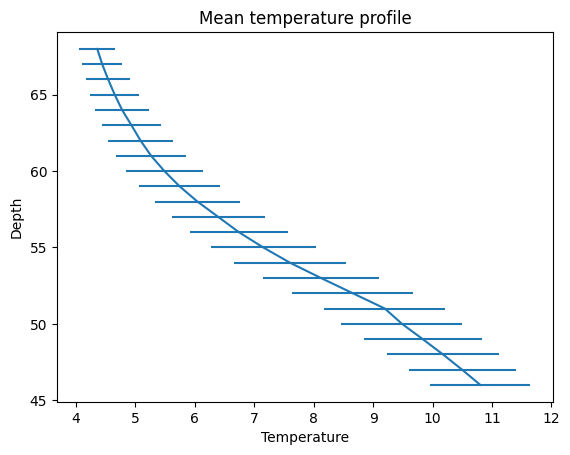

In [87]:
plt.errorbar(T_mean,level,xerr=T_std)
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean pressure profile')

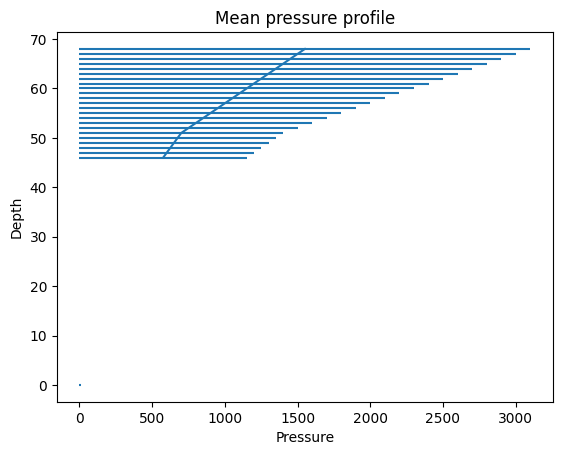

In [86]:
plt.errorbar(P_mean,level,xerr=P_std)
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean density profile')

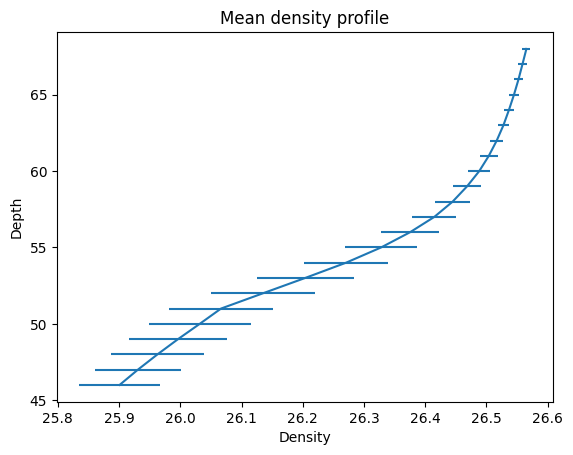

In [91]:
plt.errorbar(density_mean,level,xerr=density_std)
plt.xlabel('Density')
plt.ylabel('Depth')
plt.title('Mean density profile')

**Q7) Prise en compte des donn√©es manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiqu√©es par la valeur sp√©ciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'√©cart type des donn√©es contenant des NaN, le r√©sultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions sp√©ciales `np.nanmean` et `np.nanstd`, vous dites √† NumPy d'ignorer les NaN.

Recalculez les moyennes et les √©carts types comme dans les sections pr√©c√©dentes en utilisant ces fonctions et tracez les r√©sultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous esp√©rons que vous pouvez maintenant trouver la syntaxe compl√®te vous-m√™me üòé

In [89]:
T_nanmean=np.nanmean(T,axis=1)
T_nanstd=np.nanstd(T,axis=1)
S_nanmean=np.nanmean(S,axis=1)
S_nanstd=np.nanstd(S,axis=1)
P_nanmean=np.nanmean(P,axis=1)
P_nanstd=np.nanstd(P,axis=1)
density_nanmean=np.nanmean(densit√©_relative,axis=1)
density_nanstd=np.nanstd(densit√©_relative,axis=1)

De m√™me, recalculez les √©carts types en ignorant les valeurs manquantes.

Text(0.5, 1.0, 'Mean pressure profile')

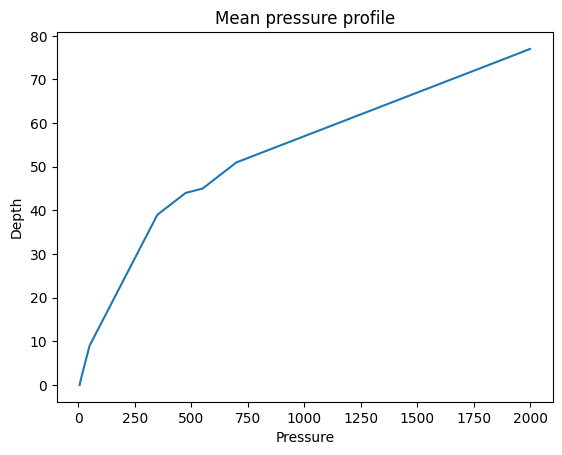

In [90]:
plt.errorbar(P_nanmean,level,xerr=P_nanstd)
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean density profile')

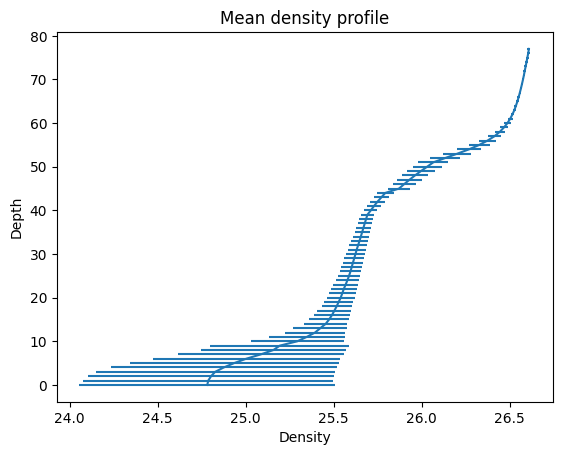

In [92]:
plt.errorbar(density_nanmean,level,xerr=density_nanstd)
plt.xlabel('Density')
plt.ylabel('Depth')
plt.title('Mean density profile')

**Q8) Cr√©ez un diagramme de dispersion des coordonn√©es longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parl√© dans le tutoriel, mais il existe une fonction de diagramme de dispersion tr√®s pratique appel√©e [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos √©tiquettes en ajoutant un argument `fontsize=` aux fonctions d'√©tiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) list√©s dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Localisations des flotteurs ARGO')

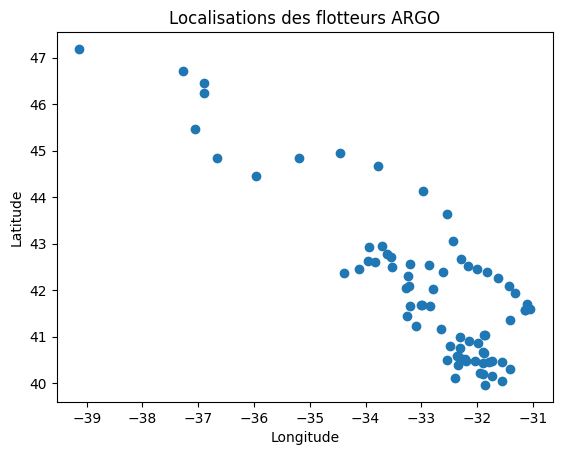

In [93]:
plt.scatter(lon,lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Localisations des flotteurs ARGO')

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [94]:
planetdict = {'mercure':0.330,'v√©nus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183


In [ ]:
#@title Code √† compl√©ter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la plan√®te que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(______=____):
  return _________/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(____________)

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unit√© que vous avez choisie pour les masses plan√©taires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-cl√© que vous avez sp√©cifi√©**.

In [109]:
# √âcrivez votre fonction ici
def convert_mterre_mjupiter(x,y):
    if y=='Terre':
        return x/planetdict['terre']
    elif y=='Jupiter':
        return x/planetdict['jupiter']
    else:
        print('Erreur')
# V√©rifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
convert_mterre_mjupiter(planetdict['jupiter'],'Terre')
mjupiter=convert_mterre_mjupiter(planetdict['jupiter'],'Jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unit√© que vous avez choisie [la plan√®te que vous voulez]).

In [116]:
# √âcrivez votre fonction ici
# V√©rifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unit√© choisie (par exemple, la plan√®te Mars)
def convert_mterre_mmars(x,Planet=''):
    a=x/planetdict['terre']
    b=x/planetdict[Planet]
    return a,b
convert_mterre_mmars(planetdict['terre'],'terre')

(1.0, 1.0)